# Introduction

The report has 5 sections in which it will cover two distinguished similarity  measures, Jaccard and Cosine. A theoretical analysis will be undertaken of the algorithmic interpretation for the application to documents containing bags of words. To verify the theoretical analysis, experiments will be conducted and their results discussed. The Cosine similarity will be looked at for both dense (vector format) and sparse (dictionary format) to see which one is more efficient. Furthermore, these measures will be used to compare 50 documents, containing more than 500 words, against eachother for their similarities. Finally the Map Reduce / Parallel processing paradigm will be looked at to see if it can lower the execution time of all pair similarity of 50 documents.

Note to reader: word count = 2030

In [8]:
#The modules below are important for conducting experiments and showing their results throughout the report
%matplotlib inline
import class_documents #include in zip folder
import time_it #included in zip folder
import matplotlib.pyplot as plt # for plotting
import scipy.stats as stats # drawing a line of regression
import numpy as np

Collecting Documents.

In [21]:
doc = class_documents.Documents()
bag_list = doc.get_documents(50)
docdicts = doc.make_dict(bag_list)
vect_rep = doc.transpose(doc.make_matrix(docdicts))
#creating large document via concatanation of the documents
one_bag = []
for n in range(50):
    one_bag += bag_list[n]
    
dict_rep = doc.compose_dic(one_bag)

# Section 1: Analysis of Jaccard’s similarity measure applied to large documents represented as bags of words (in a Python dictionary)

## The Jaccard' s similarity formula
$J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$

## Algorithmic Implementation of Jaccard's

In [22]:
def count_total(dict1):
    
    total = 0
    for item in dict1:
        total += dict1[item] #taking sum of all values in passed dict
    return total
         

def jaccard(dict1,dict2):
    
    intersection = {}
    
    #loops through a dictionary and uses an if statement to check whether it is contained in the second dictionary
    for item in dict1.keys():
        if item in dict2.keys():
            intersection[item]=min(dict1[item],dict2[item])
     
    #calculation of the intersection and union
    intersectiontot = count_total(intersection)
    union = count_total(dict1) + count_total(dict2) - intersectiontot
    
    return intersectiontot / union
    

The Jaccards measure analysis the similarity between two sets by assessing the intersection of the sets divided by their union. The similarity measure is given from 0 to 1, with 1 being the sets are identical, and zero being no similarity at all. Three processes, Intersection, divided by the union.

In terms of the algorithm above, it can be broken down into each line in terms of run time with simple units of measurement, 1 representing constant time, n for linear:

                                            count_total function
                                               runtime = 2n + 3
                                   
                                               Jaccard function
                                       intersection={} : 1
                                              for loop : n + 1
                                          if statement : n
                                      equals statement : n
                                     intersection calc : 2n + 3 + 1
                                     union calculation : 2n + 4 + 2n + 4 + 1
                                      return statement : 1
                                      
                                         total runtime = 9n + 16
                                         
In terms of the algorithm above, it computes the intersection by looping through $n$ amount of keys from a dictionary and using a conditional statement to check if it's contained in the dictionary given for comparison. The for loop's run time is directly proportional to the length of the dictionary chosen to loop through. Hence, the time to execute increases with the size of the input. The conditional statement execution time is the same amount as the for loop. This is due to Python dictionaries using a hash table, as it isn't require to iterate through the entire dictionary of comparison, stopping the runtime becoming $n$ x $n$. Considering the similarity of the documents having an effect on the run time, this should be true wen $n$ is small, ushering in a factor of difference in runtime between high and low similarities. Because, the totalling of the intersection requires a for loop, if similarity is 1, it's run time will be identical to that of the length of the dictionary. Hence, theoretically the worse case runtime will be when the similarity of the documents is 1.

Analysing $f(n) = 9n + 16$ in terms of asymptotic behaviour of the input $n$, the coefficients contained in the equation can be dropped. Theoretically, the Jaccard algorithm by big O notation is $O(n)$.

### Similarity of documents and its effect upon execution time for a small number of words.

In [109]:
print(jaccard(docdicts[11],docdicts[17]))
print(jaccard(docdicts[1],docdicts[1]))

0.22873745377707344
1.0


In [104]:
low_sim = []
high_sim = []
num = []

for n in range(1,1000):
    
    #take first n words keys of each dict, by casting the dict items to a list and slicing at n
    A_subset = {k: v for k, v in list(docdicts[11].items())[:n]}
    B_subset = {k: v for k, v in list(docdicts[17].items())[:n]}
    
    #timing the execution of jaccard
    ans, mean, error = time_it.timeit(jaccard, A_subset, B_subset)
    low_sim.append(mean)

    C_subset = {k: v for k, v in list(docdicts[1].items())[:n]}
    D_subset = {k: v for k, v in list(docdicts[1].items())[:n]}
    
    ans, mean, error = time_it.timeit(jaccard, C_subset, D_subset)
    high_sim.append(mean)
    
    num.append(n)

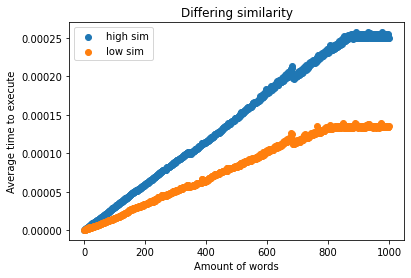

In [143]:
plt.scatter(num,high_sim)
plt.scatter(num,low_sim)
plt.ylabel("Average time to execute")
plt.xlabel("Amount of words")
plt.title("Differing similarity")
plt.legend(["high sim", "low sim"])
plt.show()

As theoretically analysed, the similarity does have a relationship to the execution time for when $n$ is small. The time starts to differentiate at 100 words and plateaus at around 900.

#### Worst case senario for Jaccard measure, identical documents with increasing number of words being added to the dictionary.

In [113]:
jac_xs = []
jac_ys = []

#timing execution of jaccard function with increase lengths of the dictionary
for n in range(10,len(dict_rep),10):
    
    #take first n words keys of each dict, by casting the dict items to a list and slicing by at n
    A_subset = {k: v for k, v in list(dict_rep.items())[:n]}
    B_subset = {k: v for k, v in list(dict_rep.items())[:n]}
  
    ans, mean_wc, error_wc = time_it.timeit(jaccard, A_subset, B_subset)
    
    jac_xs.append(n)
    jac_ys.append(mean_wc)

#### Plotting increasing words in dictionary against time taken to execute. 

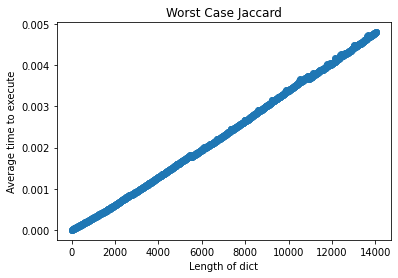

In [144]:
plt.scatter(jac_xs,jac_ys)
plt.ylabel("Average time to execute")
plt.xlabel("Length of dict")
plt.title("Worst Case Jaccard")
plt.show()

From the graph we can interpret that the Jaccards measure algorithm run time is linear, with the line being significantly straight. The growth of execution time is consistent with the growth of the length of the dictionary. There are two drops in time at around 5000 and 11,000 dictionary length but little other deviation.

Looking at the $O(n)$, this can be written as $O(n^1)$. Furthermore, as $y=c_a.x^n$. The $x$ being length of dictionary and $y$ being execution time, then logs can be applied to both sides such that: 
                                $\log(y) = \log(c_a) + n \log(x)$
                                
Plotting a graph of $\log(y)$ against $\log(x)$ the gradient will be $n$ and the $y$ intercept will be $\log(c_a)$.

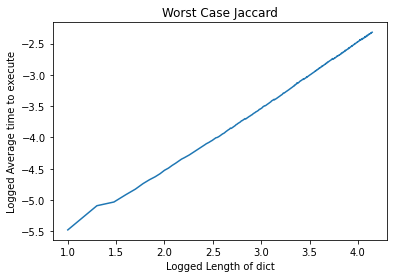

In [145]:
log_xs=[np.log10(x) for x in jac_xs]
log_ys=[np.log10(y) for y in jac_ys]

plt.plot(log_xs,log_ys)
plt.ylabel("Logged Average time to execute")
plt.xlabel("Logged Length of dict")
plt.title("Worst Case Jaccard")
plt.show()

In [146]:
slope, intercept, r_value, p_value, std_err = stats.linregress(log_xs, log_ys)
print("Slope is {} and intercept is {}".format(slope,intercept)) 

Slope is 1.044506870137251 and intercept is -6.654496390677048


## Constants for implementation and computer. 

This shows empirically $O(n^{1.04})$ which closely matches the theoretical estimated runtime by the big O notation of $O(n)$. As shown by the gradient the execution time is directly proportional to the size of the input $n$. The y intercept is -6.64, so $c_a \approx 10^{-7} = 0.0000001$. The empirical runtime can be expressed: $y = 10^{-7}*x^{1.04}$


# Section 2. Analysis of Cosine Similarity applied to documents represented as dense representation.

## The consine similarity formula
$cos\theta = \cfrac{A\cdot B}{\sqrt{A\cdot A}\sqrt{B\cdot B}}$

## Algorithmic interpretation of Cosine similarity

In [20]:
import math

def dot_prod(v1,v2):
    product = 0
    for n in range(0,len(v1)):
        product += v1[n] * v2[n]    
    return product
    
def cosine_sim(v1,v2): 
    return dot_prod(v1,v2)/ math.sqrt(dot_prod(v1,v1)*dot_prod(v2,v2))

The cosine similarity can be used on two sets to give a geometric notation of similarity. The words in the two sets being represented by their frequency in a vector. The angle between the two vectors is being measured. As this angle becomes smaller the similarity between the two documents becomes higher. As before, we can measure the algorithm above with simple units of runtime measurements.

                                          dot_product function
                                          
                                 product variable assigned : 1
                                                  for loop : n + 1
                                     calculation statement : n 
                                          return statement : 1
                                          
                                      theoretical run time = 2n + 3 
                                                
                                           cosine_sim function
                                           
                                            3 * (2n+3) + 1 = 6n + 10

Given the theoretical run time $f(n) = 6n + 10$, and the notation of big O, it can be determined that the run time will asymptotically scale as a function of $n$ to $O(n)$. The documents word frequency is represented via a vector, zeros fill the place in the vector when a document doesn't contain a corresponding word from the dictionary of comparison. The vectors are always the same length. Based on this, the worst case runtime of the algorithm is the length of the given vectors.

### Empirical investigation into the worse case of cosine similarity.

In [122]:
cos_xs = []
cos_ys = []

for n in range(50,len(dict_rep),5):
    
    #take first n word's keys of each dict, by casting the dict items to a list and slicing by n
    A_subset = {k: v for k, v in list(dict_rep.items())[:n]}
    B_subset = {k: v for k, v in list(dict_rep.items())[:n]}
    
    #creating a vector representation 
    vector_rep = doc.transpose(doc.make_matrix([A_subset,B_subset]))
  
    ans, mean, error = time_it.timeit(cosine_sim, vector_rep[0], vector_rep[1])
    
    cos_xs.append(n)
    cos_ys.append(mean)

#### Plotting the length of the vector against time taken to execute.

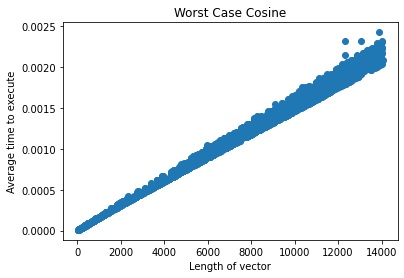

In [147]:
plt.scatter(cos_xs,cos_ys)
plt.ylabel("Average time to execute")
plt.xlabel("Length of vector")
plt.title("Worst Case Cosine")
plt.show()

Observing the graph, it can be derived that vector length has a linear relationship with the time taken to execute. Although, the deviation of the observation points is fairly spread throughout, but more when the vector length grows. This could be remedied by executing more repeats at each vector length to get a more accurate mean time.

In [125]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cos_xs, cos_ys)
print("Slope is {} and intercept is {}".format(slope,intercept))
print("Standard Error {}".format(error))

Slope is 1.5163753374384633e-07 and intercept is 1.0008375005009836e-05
Standard Error 6.639494404666089e-06


Verifying using the lingress module, the gradient is at 1.5 and it is shown that the observation points have an average variation from the mean of 6.3.

As before, we can consider this $O(n^1)$ $->$ $y=c_a.x^n$, applying logs it becomes: $\log(y) = \log(c_a) + n \log(x)$.

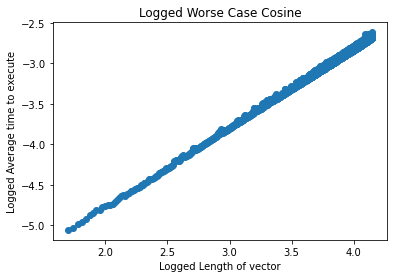

In [148]:
log_cxs=[np.log10(x) for x in cos_xs]
log_cys=[np.log10(y) for y in cos_ys]

plt.scatter(log_cxs,log_cys)
plt.ylabel("Logged Average time to execute")
plt.xlabel("Logged Length of vector")
plt.title("Logged Worse Case Cosine")
plt.show()

In [149]:
slope, intercept, r_value, p_value, std_err = stats.linregress(log_cxs, log_cys)
print("Slope is {} and intercept is {}".format(slope,intercept))

Slope is 0.9792147961402823 and intercept is -6.734123472452331


### Estimated constant for my implementation and computer.

Upon the investigation into the runtime of the cosine measure applied to different lengths of documents in dense representation, it can be empirically verified from the experiment conducted that the worse case runtime can be approximated at $y = 10^-7*x^{0.98}$. The gradient showcasing that the size of the vector has a linear relationship to the execution time of the cosine similarity function. Therefore, by the big O notation for asymptotic behaviour of the cosine similarity function of $n$, it can be denoted $O(n)$.

#### Comparison with the numpy dot product method

In [128]:
#dot product implementation
def cosine_sim_dot(v1, v2):
    return np.dot(v1,v2) / ( np.dot(v1,v2) * np.dot(v1,v2) ) ** 0.5

In [129]:
dcos_xs = []
dcos_ys = []

for n in range(50,len(dict_rep),5):
    
    #take first n word's keys of each dict, by casting the dict items to a list and slicing by n
    A_subset = {k: v for k, v in list(dict_rep.items())[:n]}
    B_subset = {k: v for k, v in list(dict_rep.items())[:n]}
    
    #trasposing in order to compute the dot product of the two vectors
    vector_rep = doc.transpose(doc.make_matrix([A_subset,B_subset]))
  
    ans, mean, error = time_it.timeit(cosine_sim_dot, vector_rep[0], vector_rep[1])
    
    dcos_xs.append(n)
    dcos_ys.append(mean)
    

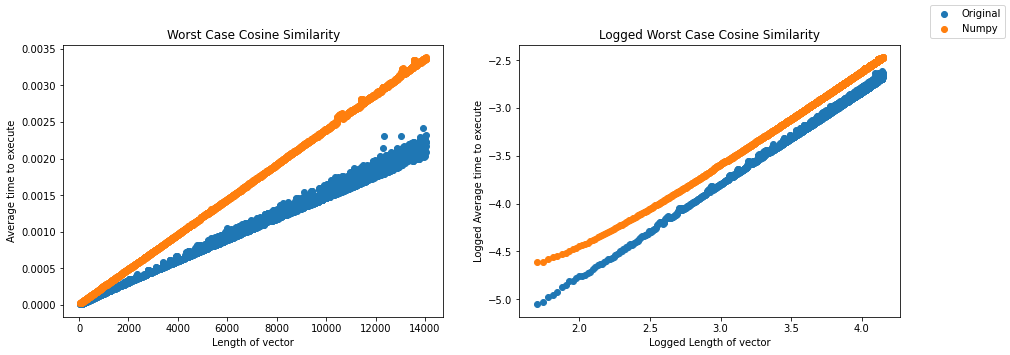

In [158]:
log_dcxs=[np.log10(x) for x in dcos_xs]
log_dcys=[np.log10(y) for y in dcos_ys]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

label = ["Original", "Numpy"]
ax1.scatter(cos_xs,cos_ys)
ax1.scatter(dcos_xs,dcos_ys)
ax1.set_ylabel("Average time to execute")
ax1.set_xlabel("Length of vector")
ax1.set_title("Worst Case Cosine Similarity")


ax2.scatter(log_cxs,log_cys)
ax2.scatter(log_dcxs,log_dcys)
ax2.set_ylabel("Logged Average time to execute")
ax2.set_xlabel("Logged Length of vector")
ax2.set_title("Logged Worst Case Cosine Similarity")
fig.legend(label)

The Numpy implementation is of similar trend of growth with the original, with a tighter standard error, and more visibly linear. The gradient of the two are significantly similar. In order to get a more accurate comparison let's take a look at the estimated constants for the runtime for both.

In [156]:
slope, intercept, r_value, p_value, std_err = stats.linregress(log_dcxs, log_dcys)
print("Slope is {} and intercept is {}".format(slope,intercept)) 

Slope is 0.9622024646875632 and intercept is -6.472489070354431


The original implementation estimated $y = 10^-{7}*x^{0.98}$. The Numpy implementation $y = 10^{-6}*x^{0.96}$. Here it is shown empirically that the Numpy function is slightly greater by 0.02. If required to choose between, the Numpy displays less deviation of execution time, and is more efficient.

# Section 3: Cosine similarity measure, directly from sparse (dictionary) representation, with a theoretical comparison with the Cosine Similarity (dense representation) and Jaccard Similarity

### Algorithmic interpretation of cosine similarity from sparse representation of a bag of words 

In [11]:
def dot_dict(dict1,dict2):
    
    product = 0
    
    #checking the lengths of the dictionarys passed in order to obtain the efficient run time
    if len(dict1) < len(dict2):
        #looping through dictionary and taking the keys to use in the if statement in order 
        #to check whether the word is in the dictionary of comparison
        for item in dict1.keys(): 
            if item in dict2.keys():
                product += dict1[item] * dict2[item] #multiplying the frequencies of the matched words
    else:
        for item in dict2.keys():
            if item in dict1.keys():
                product += dict1[item] * dict2[item]
                
    return product

def cosine_sim_dict(v1,v2): 
    return dot_dict(v1,v2)/math.sqrt(dot_dict(v1,v1)*dot_dict(v2,v2))

The algorithm above uses two functions. First, the cosine_sim_dict formulates the formula of the cosine similarity. The majority of the work is done via the dot_dict function, where a conditional statement is done on the passed dictionaries to check for the shortest of the two. Reason being, the shortest will have the words that are possible within both, the largest length dictionary will run through excess words and could potentially reduce the efficiency of the algorithm. If the conditional statement is met, the frequency of the word is summed.

#### Theoretical comparison of cosine sparse with dense representation and the Jaccard

Structurally, the algorithm is similar to its dense representation counterpart. One major difference is instead of lists, it implements dictionaries (sparse). Given that a dictionary is looped through three times, it's close to that of Jaccard, which has four. Although, depending on the similarity, one of those loops in Jaccard could potentially been very small. This leads to the conclusion that theoretically the run time of Cosine sparse should be similar to that of Jaccard.

#### A check for the correctness of the implementation with a sample of documents

In [243]:
dcs_imp = []

for i in range(6):
    for j in range(2):
        vector_r = doc.transpose(doc.make_matrix([docdicts[i],docdicts[j]]))
        dcs_imp.append([(i,j),cosine_sim(vector_r[0],vector_r[1]),cosine_sim_dict(docdicts[i],docdicts[j])])

In [244]:
import pandas as pd

df =pd.DataFrame(dcs_imp,columns=["Document","Dense","Sparse"])
print(df)

   Document     Dense    Sparse
0    (0, 0)  1.000000  1.000000
1    (0, 1)  0.922340  0.922340
2    (1, 0)  0.922340  0.922340
3    (1, 1)  1.000000  1.000000
4    (2, 0)  0.931504  0.931504
5    (2, 1)  0.916208  0.916208
6    (3, 0)  0.924918  0.924918
7    (3, 1)  0.903979  0.903979
8    (4, 0)  0.930288  0.930288
9    (4, 1)  0.887301  0.887301
10   (5, 0)  0.941991  0.941991
11   (5, 1)  0.921034  0.921034


The sparse implementation outputs are identical to dense within the sample set.

### Empirical Analysis of sparse representation

In [163]:
scos_xs = []
scos_ys = []

for n in range(10,len(dict_rep),10):
    
    #take first n words keys of each dict, by casting the dict items to a list and slicing at n
    A_subset = {k: v for k, v in list(dict_rep.items())[:n]}
    B_subset = {k: v for k, v in list(dict_rep.items())[:n]}
  
    ans, mean, error = time_it.timeit(cosine_sim_dict, A_subset, B_subset)
    
    scos_xs.append(n)
    scos_ys.append(mean)

#### Plotting Cosine dense representation, sparse and Jaccard 

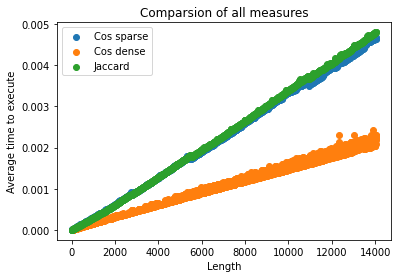

In [164]:
plt.scatter(scos_xs,scos_ys)
plt.scatter(cos_xs,cos_ys)
plt.scatter(jac_xs,jac_ys)
plt.ylabel("Average time to execute")
plt.xlabel("Length")
plt.title("Comparsion of all measures")
plt.legend(["Cos sparse", "Cos dense", "Jaccard"])
plt.show()

As theorised above, the sparse implementation is highly similar to the linear trajectory of the Jaccards.

In [263]:
log_scx = [np.log10(x) for x in scos_xs]
log_scy = [np.log10(y) for y in scos_ys]
slope, intercept, r_value, p_value, std_err = stats.linregress(log_dcxs, log_dcys)
print("Slope is {} and intercept is {}".format(slope,intercept)) 

Slope is 0.9622024646875632 and intercept is -6.472489070354431


$y = 10^-{6}*x^{0.96}$, which is slightly better than Jaccard and identical to Numpy dot product implementation.

# Section 4: All-pairs similarities for a collection of document

### Algorithmic Interpretation of All Pair Similarity

In [5]:
def all_pairs_similarity(sim_func, dictdocs):
    
    sims = []
    
#nested loops to compare all docs against eachother using specified similarity measure
    if sim_func == 'cos':
        
        doc_list = doc.transpose(doc.make_matrix(dictdocs))
        
        for doc_a in doc_list:
            row_sim = []   
            for doc_b in doc_list:
                row_sim.append(cosine_sim(doc_a,doc_b))
            
            sims.append(row_sim)
        
    elif sim_func == 'jac':
        
        for doc_a in dictdocs:
            row_sim = []   
            for doc_b in dictdocs:
                row_sim.append(jaccard(doc_a,doc_b))
                
            sims.append(row_sim)
            
    elif sim_func == 'spacos':
        
        for doc_a in dictdocs:
            row_sim = []   
            for doc_b in dictdocs:
                row_sim.append(cosine_sim_dict(doc_a,doc_b))
                
            sims.append(row_sim)

             
    return sims

The algorithm takes a similarity function and document list. The nested for loop compares every dictionary against eachother in the list. The similarity function called within the nested for loop adds another order to the current quadratic run time. The theoretical worse case runtime for this algorithm is $O(n^{3})$.

### Empirical analysis

#### Investigate the time to execute all pair similarity with increasing number of documents.

In [12]:
jac_ap = []
cos_ap = []
spa_cos = []
num_docs = []

#looping maxium length of the list of dictionarys (50)
for n in range(10,50):

    ans, mean, error = time_it.timeit(all_pairs_similarity, 'jac', docdicts[:n], repeats = 50)
    jac_ap.append(mean)
    
    ans, mean, error = time_it.timeit(all_pairs_similarity, 'cos', docdicts[:n], repeats = 50)
    cos_ap.append(mean)
    
    ans, mean, error = time_it.timeit(all_pairs_similarity, 'spacos', docdicts[:n], repeats = 50)
    spa_cos.append(mean)
    
    num_docs.append(n)

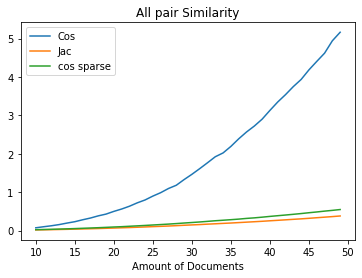

In [266]:
plt.plot(num_docs,cos_ap)
plt.plot(num_docs,jac_ap)
plt.plot(num_docs,spa_cos)
plt.xlabel("Amount of Documents")
plt.title("All pair Similarity")
plt.legend(["Cos", "Jac", "cos sparse"])

In [270]:
log_cdr = [np.log10(x) for x in cos_ap]
log_jac = [np.log10(x) for x in jac_ap]
log_numap = [np.log10(y) for y in num_docs]
slope, intercept, r_value, p_value, std_err = stats.linregress(log_numap, log_cdr)
print("Cos Sparse - Slope is {} and intercept is {}".format(slope,intercept)) 
slope, intercept, r_value, p_value, std_err = stats.linregress(log_numap, log_jac)
print("Jaccard - Slope is {} and intercept is {}".format(slope,intercept)) 

Cos Sparse - Slope is 2.6601433026118966 and intercept is -3.7691912815603756
Jaccard - Slope is 1.9752732495817478 and intercept is -3.75793481427303


The growth of the cosine measure rises significantly with the increase of documents above 15. At 50 documents the execution time is nearly five seconds more than the Jaccards and Cosine Sparse. The question of whether the similarity measure is of concern, it is evident that for documents up to 50 the Jaccard similarity measure is a more efficient algorithm. Jaccard has a empirically different result, it runs at $O(n^{2})$. Given that the cosine sparse implementation is similar, it can be put down to the dictionary representation(sparse) of the documents of words. The consine has gradient 2.66, slower than 3, due to operations being performed outside of the nested loop.

The repective equations for this implementation: $y = 0.0001 * x^{2.66}$ and $y = 0.0001 * x^{1.97}$

### Estimating the runtime of 200k for all pair similarity

If processing 200k documents, this magnitude of input could be classified as asymptotic. In the theoretical analysis it was given that the worse case for this algorithm is $O(n^{3})$. Empirically, that figure is for dense representation and $O(n^{2})$ is given to sparse representation. Hence, the estimate for 200k documents for sparse: $0.0001 * 200000^{2}$ = $4000000$ seconds, and dense: $0.0001 * 200000^{3}$ = $8×10^{11}$ seconds.

# Section 5: Parallel Map Reduce Implementation

In this section the Map Reduce paradigm is implemented in conjunction with parallel processing in order to reduce the runtime of all pair similarity of documents.

In [19]:
from multiprocessing import Pool
from collections import defaultdict

In [18]:
def mapper(document):
    
    output = []
    
    #mapping values to associated key
    for num in document:
        output.append((str(num[0]),num))
         
    return output

In [17]:
def jaccard_reducer(item):
    
    output = []
    
    (key, values) = item
    
    #looping through the mapped document indexe
    for value in values:
        
        jac = jaccard(docdicts[value[0]],docdicts[value[1]])
        
        output.append(((value[0],value[1]),jac))
        
    return output

In [24]:
def cosine_reducer(item):
    
    output = []
    
    (key, values) = item
    
    #looping through the mapped document indexes
    for value in values: 
        cos_sim = cosine_sim(vect_rep[value[0]],vect_rep[value[1]]) 
        output.append(((value[0],value[1]),cos_sim))
        
    return output

In [15]:
def map_reduce_parallel(doc, mapper, reducer, mapprocesses = 3,reduceprocesses = 2):
    
    outputs = []
    collector = defaultdict(list)  #this dictionary is where we will store intermediate results
                                 
    #creating given amount processes for mapper
    mappool = Pool(processes = mapprocesses)
    
    #assigning processes
    mapresults = mappool.map(mapper, doc)
    mappool.close()

    for mapresult in mapresults:
        for (key, value) in mapresult:     #pass each input to the mapper function and receive back each key,value pair
            collector[key].append(value)     #append the value to the list for that key in the intermediate store

    #creating given amount processes for reduce
    reducepool = Pool(processes = reduceprocesses)
    
    #allocating processes
    reduceresults = reducepool.map(reducer, collector.items())
    reducepool.close()
    
    #assemble results
    for reduceresult in reduceresults:
        outputs += reduceresult
        
    return outputs

In [14]:
#creating an list of indexes of all the different combinations of documents
def all_pairs_mapreduce(my_docs, mapper, reducer, mp = 3, rp = 2):
    
    sims = []
    
    for i in range(len(my_docs)):
        rowsims=[]
        for j in range(len(my_docs)):
            rowsims.append([i,j])
            
        sims.append(rowsims)
            
    return map_reduce_parallel(sims, mapper, reducer, mp, rp)

The function all_pairs_mapreduce serves for creating all the combination of documents to be passed into the map reduce function. The mapper creates key value pairs from this input. This is then passed into the reducer function which calculates the similarity measure and collects the results. Both the map and reduce stages are executed in parallel with a given amount of processes allocated, either by default, or as an argu
ment. If the passed in the dictionary of documents slice [3:30] it would fail to execute. This is because all_pairs_mapreduce method simply creates an index of every combination of the given dictionary. Not the actually position this dictionary is in the parent list.

#### Correctness and effeciency check of map reduce

An arbitrary amount of documents are taken to check the correctness of the map reduce for both Cosine and Jaccard.

In [199]:
ap_sim = all_pairs_similarity('jac', docdicts[:4])
ap_sim_mr = all_pairs_mapreduce(docdicts[:4], mapper, jaccard_reducer)

print(ap_sim[:1])
print(ap_sim_mr[:4])

[[1.0, 0.3405517650548799, 0.3265785609397944, 0.31611570247933884]]
[((0, 0), 1.0), ((0, 1), 0.3405517650548799), ((0, 2), 0.3265785609397944), ((0, 3), 0.31611570247933884)]


In [256]:
ap_sim = all_pairs_similarity('spacos', docdicts[:5])
ap_sim_mr = all_pairs_mapreduce(docdicts[:8], mapper, cosine_reducer)

print(ap_sim[:1])
print(ap_sim_mr[:5])

[[1.0, 0.9223404674452017, 0.9315044962441451, 0.9249181173135336, 0.9302878354686984]]
[((0, 0), 1.0), ((0, 1), 0.9223404674452017), ((0, 2), 0.9315044962441451), ((0, 3), 0.9249181173135336), ((0, 4), 0.9302878354686984)]


The map reduce is producing the same results as the standard all pairs. Now for the efficiency test.

In [28]:
ans, mean_cos, error = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, repeats = 50)
ans, mean_jac, error = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, repeats = 50)

print(mean_cos)
print(mean_jac)


2.9709797620773317
0.2577135801315308


In [30]:
ans, mean_jac_norm, error = time_it.timeit(all_pairs_similarity, 'jac', docdicts, repeats = 50)
ans, mean_cos_norm, error = time_it.timeit(all_pairs_similarity, 'cos', docdicts, repeats = 50)

print(mean_cos_norm)
print(mean_jac_norm)

5.245241184234619
0.3966351509094238


The map reduce parallel took over two seconds off the cosine similarity execution time, but added addition time to the jaccard. Manipulating the process for the mapper and reducer may produce lower results.

#### Investigation into optimal allocation of map and reduce processes

In [34]:
#test 1
ans, meanc, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, mp=4,rp=4, repeats = 50)
ans, meanj, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, mp=4,rp=4, repeats = 50)
print(meanc)
print(meanj)

1.5157763004302978
0.14996879577636718


In [35]:
#test 2
ans, meanc, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, mp=2,rp=5, repeats = 50)
ans, meanj, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, mp=2,rp=5, repeats = 50)
print(meanc)
print(meanj)

1.3238863706588746
0.14290022373199462


In [36]:
#test 3 
ans, meanc, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, mp=2,rp=6, repeats = 50)
ans, meanj, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, mp=2,rp=6, repeats = 50)
print(meanc)
print(meanj)

1.011369185447693
0.13006983280181886


In [37]:
#test 4
ans, meanc, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, mp=1,rp=7, repeats = 50)
ans, meanj, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, mp=1,rp=7, repeats = 50)
print(meanc)
print(meanj)

0.9808829307556153
0.18402697563171386


In [38]:
#test 5
ans, meanc, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, mp=2,rp=10, repeats = 50)
ans, meanj, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, mp=2,rp=10, repeats = 50)
print(meanc)
print(meanj)

0.7203324127197266
0.1200319004058838


In [39]:
#test 6
ans, meanc, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, mp=2,rp=15, repeats = 50)
ans, meanj, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, mp=2,rp=15, repeats = 50)
print(meanc)
print(meanj)

0.6003373193740845
0.11373273849487305


In [40]:
#test 7
ans, meanc, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, cosine_reducer, mp=15,rp=15, repeats = 50)
ans, meanj, er = time_it.timeit(all_pairs_mapreduce, docdicts, mapper, jaccard_reducer, mp=15,rp=15, repeats = 50)
print(meanc)
print(meanj)

0.6177734708786011
0.132286114692688


The process followed that map process of 2 gave an optimum result over both the original 3 then 4,1. A sanity check of a higher number 15, but proved worse in test 7. Since the similarity is calculated in the reducer it correlates that when we increase the reduce process for this, time execution drastically for cosine. Most significantly for the cosine. From the original 5.2 basic all pair sim, to 0.61 in parallel when map process = 2 and reduce process = 15.

# Summary

After investigating the Jaccard and Cosine similarity, it was derived that they could be denoted with $O(n)$ by big O notation. The dense (vector) representation of the documents when applied with Numpy's dot product was ever so slighty more efficient in execution time than the rest. However, an interesting relationship appeared when applying both forms of data representation within a nested loop. The sparse representation performing better by a whole order of polynomial. The Map Reduce/Parallel implementation yielded low execution times in comparison to the ordinary all pair function by almost 5 seconds. Leaving it not far behind the Jaccard.